In [5]:
## MACD-Hist Divergence Trading Strategy 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df = pd.read_csv('../data/df_ETH-2017-01-01-2018-10-08-FREQ-1h.csv', index_col= 0)


print(df.columns)



Index(['open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignored'],
      dtype='object')


In [6]:
df.head()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignored
open_time,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.0,301.61,125.66877,2017-08-17 04:59:59,37684.804181,129,80.56377,24193.440789,47039.706757
2017-08-17 05:00:00,301.61,303.28,300.0,303.10,377.67246,2017-08-17 05:59:59,114043.282676,202,328.10428,99079.803569,47250.805175
2017-08-17 06:00:00,302.40,304.44,301.9,302.68,303.86672,2017-08-17 06:59:59,92034.441294,182,259.28668,78525.948613,47176.444584
2017-08-17 07:00:00,302.68,307.96,302.6,307.96,754.74510,2017-08-17 07:59:59,229725.136967,198,592.43176,180297.966961,46884.543391
2017-08-17 08:00:00,307.95,309.97,307.0,308.62,150.75029,2017-08-17 08:59:59,46559.462371,182,140.68470,43451.495398,46771.057342


In [7]:
df = df[['open', 'high', 'low', 'close', 'volume']]

In [8]:
df.head()

,open,high,low,close,volume
open_time,,,,,
2017-08-17 04:00:00,301.13,302.57,298.0,301.61,125.66877
2017-08-17 05:00:00,301.61,303.28,300.0,303.10,377.67246
2017-08-17 06:00:00,302.40,304.44,301.9,302.68,303.86672
2017-08-17 07:00:00,302.68,307.96,302.6,307.96,754.74510
2017-08-17 08:00:00,307.95,309.97,307.0,308.62,150.75029


In [4]:
## Trying the MACD-hist strategy

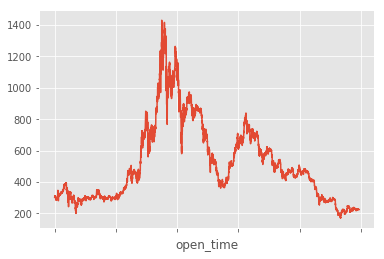

In [9]:
df.close.plot()

In [10]:
def EMA(values, window):
    """ Numpy implementation of EMA
    """
    weights = np.exp(np.linspace(-1., 0., window))
    weights /= weights.sum()
    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:window] = a[window]
    return a
    
def MACD(x, nslow=26, nfast=12):
    emaslow = EMA(x, nslow)
    emafast = EMA(x, nfast)
    macd = emafast - emaslow
    signal = EMA(macd, 9)
    hist = macd - signal
    return macd, signal,hist

In [11]:
df['macd'], df['signal'], df['hist'] = MACD(df.close)

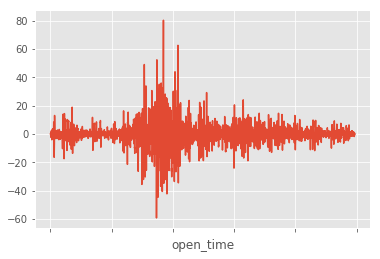

In [12]:
df['hist'].plot()

In [ ]:
import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime

# -------------------------------------------------------------
# Definition for MACD as follows: 
# MACD Line = 12-day EMA - 26-day EMA
# Signal Line = 9-day EMA of MACD Line
# MACD Histogram = MACD Line - Signal Line
#
# EMA: Exponential Moving Average; various definitions exist
# -------------------------------------------------------------

# returns time_series for macd line
def macd(time_series, slow_period=26, fast_period=12):
    emaslow = time_series.ewm(span=slow_period, adjust=False).mean()
    emafast = time_series.ewm(span=fast_period, adjust=False).mean()    
    return emafast, emaslow, emafast - emaslow


# set up MACD parameters
slow_period = 26
fast_period = 12
signal_period = 9

# compute the MACD datapoints
emaslow, emafast, macd_line = macd(df['close'], slow_period, fast_period)
signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()

# draw the MACD lines and histogram
f1, ax1 = plt.subplots(figsize = (8,4))
ax1.plot(df.index, df['close'], color = 'black', lw=2, label='close')
ax1.plot(df.index, emaslow, color ='blue', lw=1, label='EMA(26)')
ax1.plot(df.index, emafast, color ='red', lw=1, label='EMA(12)')

f2, ax2 = plt.subplots(figsize = (8,4))
ax2.plot(df.index, macd_line, color='green', lw=1,label='MACD Line(26,12)')
ax2.plot(df.index, signal_line, color='purple', lw=1, label='Signal Line(9)')

# set other parameters
ax1.legend(loc='upper right')
ax1.set(title = 'Starbucks Stock Price', ylabel = 'Price')
ax2.fill_between(df.index, macd_line - signal_line, color = 'gray', alpha=0.5, label='MACD Histogram')
ax2.set(title = 'MACD(26,12,9)', ylabel='MACD')
ax2.legend(loc = 'upper right')
ax2.grid(False)

plt.show()